In [1]:
import torch
from train_pl import AudioVisualModel
import matplotlib.pyplot as plt

CUDA is Available:  True


In [4]:
class ARGS:
    lr = 0.001
    batch_size= 1
    num_dataset_workers = 1
    
    audio_dataset = "SingleChannelAVSpeech"
    noise_dataset= "WHAM"
    audio_dataset_path= "/scratch/vahid/AVSpeech/"
    noise_dataset_path= ""
    n_speakers= 1
    sampling_rate= 16000
    duration= 3.0
    task='tr'
    audio_only=True
    add_noise=False
    noise_db_bounds=(0, 0)
    noise_db_bounds_test=(0, 0)
    dynamic_mixing=False
    ref_mic=0
    mic_idx=[0]
    moving_source=True
    denoise_audio = False
    
    
    n_mel_channels = 80 
    ngf = 32 
    n_residual_layers = 3
    ndf = 16 
    num_D = 3 
    n_layers_D = 4
    downsamp_factor = 4
    lambda_feat = 10
    cond_disc = True
    

m = AudioVisualModel(ARGS())

/scratch/vahid/melgan/mel2wav/modules.py:42: FutureWarning: Pass sr=22050, n_fft=1024, n_mels=80, fmin=0.0, fmax=None as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_basis = librosa_mel_fn(


Sequential(
  (0): Generator(
    (model): Sequential(
      (0): ReflectionPad1d((3, 3))
      (1): Conv1d(80, 512, kernel_size=(7,), stride=(1,))
      (2): LeakyReLU(negative_slope=0.2)
      (3): ConvTranspose1d(512, 256, kernel_size=(16,), stride=(8,), padding=(4,))
      (4): ResnetBlock(
        (block): Sequential(
          (0): LeakyReLU(negative_slope=0.2)
          (1): ReflectionPad1d((1, 1))
          (2): Conv1d(256, 256, kernel_size=(3,), stride=(1,))
          (3): LeakyReLU(negative_slope=0.2)
          (4): Conv1d(256, 256, kernel_size=(1,), stride=(1,))
        )
        (shortcut): Conv1d(256, 256, kernel_size=(1,), stride=(1,))
      )
      (5): ResnetBlock(
        (block): Sequential(
          (0): LeakyReLU(negative_slope=0.2)
          (1): ReflectionPad1d((3, 3))
          (2): Conv1d(256, 256, kernel_size=(3,), stride=(1,), dilation=(3,))
          (3): LeakyReLU(negative_slope=0.2)
          (4): Conv1d(256, 256, kernel_size=(1,), stride=(1,))
        )
 

In [26]:
d = m.train_dataset.__getitem__(10)

In [27]:
d["audio"].shape

torch.Size([3, 1, 48000])

In [28]:
mel = m.fft(d["audio"][0])[0]

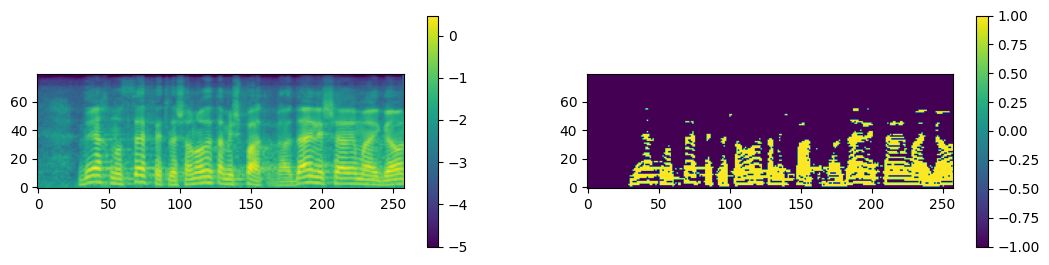

In [38]:
fig, AX =  plt.subplots(figsize=(13, 3), ncols=2)
pos = AX[0].imshow(mel, origin = "lower")
fig.colorbar(pos, ax=AX[0])
pos = AX[1].imshow(torch.sign(mel+1), origin = "lower")
fig.colorbar(pos, ax=AX[1])